In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
in_file_name = 'data/grouped_paces_ju.tsv'
df_all = pd.read_csv(in_file_name, delimiter="\t")

In [3]:
#df = df_all[np.isfinite(df_all.pace_1)]
df = df_all

In [4]:
paces = df.as_matrix(["pace_2", "pace_3", "pace_4", "pace_5", "pace_6"])
logs = np.log(paces)
means = np.nanmean(logs, axis=1)
stdevs = np.nanstd(logs, axis=1)
df = df.assign(log_means=pd.Series(means).values)
df = df.assign(log_stdevs=pd.Series(stdevs).values)

/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [5]:
# Estimate values for all, but only use them if not other value is available
with_history = df[np.isfinite(df_all.pace_3)]
x = with_history.as_matrix(["mean_team_id"])
x = x.reshape(len(x), 1)

log_means = with_history.log_means.values.reshape(len(with_history.log_means), 1)
log_means_model = linear_model.LinearRegression()
log_means_model.fit(x, log_means)
estimated_log_means = log_means_model.predict(df.mean_team_id.values.reshape(len(df.mean_team_id), 1))
df = df.assign(estimated_log_means=estimated_log_means)

log_stdevs = with_history.log_stdevs.values.reshape(len(with_history.log_stdevs), 1)
log_stdevs_model = linear_model.LinearRegression()
log_stdevs_model.fit(x, log_stdevs)
estimated_log_stdevs = log_stdevs_model.predict(df.mean_team_id.values.reshape(len(df.mean_team_id), 1))
df = df.assign(estimated_log_stdevs=estimated_log_stdevs)



/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [6]:
df

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,log_means,log_stdevs,estimated_log_means,estimated_log_stdevs
0,52.7,BROMMA-VÄLLINGBY SOK/JÄRFÄL;IFK GÖTEBORG,max peter bejmer,3,3,6.337,1.050,5.582,5.608,7.822,NaN,NaN,NaN,1.890567,0.166373,1.944796,0.087202
1,91.0,IFK GÖTEBORG;MARKBYGDENS OK,johan högstrand,4,4,6.198,0.468,5.591,5.902,6.571,6.728,NaN,NaN,1.854745,0.057003,1.962559,0.087890
2,13.2,IFK GÖTEBORG,vetle ruud bråten,4,4,5.750,0.181,5.688,5.636,5.615,6.060,NaN,NaN,1.752109,0.035106,1.926477,0.086493
3,33.2,IFK GÖTEBORG,jonas pilblad,5,5,6.083,0.389,5.978,5.772,6.819,5.756,6.089,NaN,1.807365,0.068628,1.935752,0.086852
4,17.5,IFK GÖTEBORG;OK KÅRE,fredrik edn,2,2,6.333,0.472,5.861,6.805,NaN,NaN,NaN,NaN,1.917658,0.000000,1.928471,0.086570
5,10.5,IFK LIDINGÖ SOK;IFK GÖTEBORG,fredrik bakkman,2,2,5.483,0.028,5.511,5.455,NaN,NaN,NaN,NaN,1.696533,0.000000,1.925225,0.086444
6,16.8,IFK GÖTEBORG,eskil kinneberg,4,4,5.623,0.084,5.611,5.494,5.719,5.668,NaN,NaN,1.727429,0.017203,1.928146,0.086558
7,21.3,KOOVEE,topi anjala,6,6,6.080,0.516,5.621,6.100,5.977,7.164,5.642,5.974,1.816586,0.080558,1.930233,0.086638
8,1.0,KOOVEE,olexander kratov,1,1,5.874,0.000,5.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.920819,0.086274
9,6.7,VAAJAKOSKEN TERÄ;KOOVEE,jani lakanen,6,6,6.044,0.456,5.874,5.734,6.208,6.717,5.326,6.403,1.801252,0.082382,1.923462,0.086376


In [7]:
# s = sigma and scale = exp(mu).
df['final_log_means'] = np.where(np.isfinite(df["log_means"]) & df["log_means"]>0, df["log_means"], df["estimated_log_means"])
final_log_means = np.exp(df['final_log_means']) 
df['final_log_stdevs'] = np.where(np.isfinite(df["log_stdevs"]) & df["log_stdevs"]>0, df["log_stdevs"], df["estimated_log_stdevs"])
final_log_stdevs = df['final_log_stdevs']

intervals95 = lognorm.interval(0.95, s = final_log_stdevs, scale = final_log_means)
means = lognorm.mean(s = final_log_stdevs, scale = final_log_means)
medians = lognorm.median(s = final_log_stdevs, scale = final_log_means)

In [8]:

df = df.assign(interval95_start = pd.Series( intervals95[0] ).values)
df = df.assign(interval95_end = pd.Series( intervals95[1] ).values)
df = df.assign(p1_in_interval = pd.Series( (df.interval95_start <= df.pace_1) & (df.interval95_end >= df.pace_1) ).values)
df = df.assign(mean_ln = pd.Series(means).values)
df = df.assign(med_ln = pd.Series(medians).values)

In [9]:
df

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,pace_1,pace_2,pace_3,...,log_stdevs,estimated_log_means,estimated_log_stdevs,final_log_means,final_log_stdevs,interval95_start,interval95_end,p1_in_interval,mean_ln,med_ln
0,52.7,BROMMA-VÄLLINGBY SOK/JÄRFÄL;IFK GÖTEBORG,max peter bejmer,3,3,6.337,1.050,5.582,5.608,7.822,...,0.166373,1.944796,0.087202,1.890567,0.166373,4.780198,9.176560,True,6.715426,6.623124
1,91.0,IFK GÖTEBORG;MARKBYGDENS OK,johan högstrand,4,4,6.198,0.468,5.591,5.902,6.571,...,0.057003,1.962559,0.087890,1.854745,0.057003,5.714579,7.145405,False,6.400459,6.390069
2,13.2,IFK GÖTEBORG,vetle ruud bråten,4,4,5.750,0.181,5.688,5.636,5.615,...,0.035106,1.926477,0.086493,1.752109,0.035106,5.383299,6.177514,True,5.770305,5.766750
3,33.2,IFK GÖTEBORG,jonas pilblad,5,5,6.083,0.389,5.978,5.772,6.819,...,0.068628,1.935752,0.086852,1.807365,0.068628,5.327360,6.971798,True,6.108733,6.094365
4,17.5,IFK GÖTEBORG;OK KÅRE,fredrik edn,2,2,6.333,0.472,5.861,6.805,NaN,...,0.000000,1.928471,0.086570,1.917658,0.086570,5.743009,8.063374,True,6.830548,6.805000
5,10.5,IFK LIDINGÖ SOK;IFK GÖTEBORG,fredrik bakkman,2,2,5.483,0.028,5.511,5.455,NaN,...,0.000000,1.925225,0.086444,1.696533,0.086444,4.604825,6.462140,True,5.475420,5.455000
6,16.8,IFK GÖTEBORG,eskil kinneberg,4,4,5.623,0.084,5.611,5.494,5.719,...,0.017203,1.928146,0.086558,1.727429,0.017203,5.439636,5.819101,True,5.627003,5.626170
7,21.3,KOOVEE,topi anjala,6,6,6.080,0.516,5.621,6.100,5.977,...,0.080558,1.930233,0.086638,1.816586,0.080558,5.252450,7.202858,True,6.170816,6.150825
8,1.0,KOOVEE,olexander kratov,1,1,5.874,0.000,5.874,NaN,NaN,...,NaN,1.920819,0.086274,1.920819,0.086274,5.764539,8.084205,True,6.851998,6.826545
9,6.7,VAAJAKOSKEN TERÄ;KOOVEE,jani lakanen,6,6,6.044,0.456,5.874,5.734,6.208,...,0.082382,1.923462,0.086376,1.801252,0.082382,5.154065,7.118654,True,6.077817,6.057227


In [10]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
mean_err = rmse(df.mean_ln, df.pace_1)
med_err = rmse(df.med_ln, df.pace_1)
(mean_err, med_err)

(2.541390016173329, 2.5301453673082346)

In [11]:
np.mean(df.p1_in_interval)

0.6590752242926156

In [12]:
df.to_csv('data/log_normal_estimates_ju.tsv', sep="\t")

In [13]:
runs17 = pd.read_csv('data/csv-results_j2017_ju.tsv', delimiter="\t")


In [14]:
def get_estimate_row(row):
    name = row["competitor-name"].lower()
    
    by_name = df[df['name'] == name]
    by_name_and_colon = df[df['name'].str.contains(name +":", regex=False)]

    runners = by_name.append(by_name_and_colon)
    if(len(runners) == 1):
        return runners
    team_name = row["team-name"].upper()
    runners = runners[runners['teams'].str.contains(team_name, regex=False)]
    if(len(runners) == 1):
        return runners
    print(f"name '{name}' team_name '{team_name}'")
    print(f"by_name {len(by_name)} by_name_and_colon {len(by_name_and_colon)} runners {len(runners)}")
    #print(f"Duplicate runner {runners}")
    #print(f"TEAMS by_name_and_colon {by_name_and_colon['teams']}")
    return runners.iloc[0]

def get_estimate_params(row):
    estimate_row = get_estimate_row(row)
    final_log_means = estimate_row.final_log_means.values[0]
    final_log_stdevs = estimate_row.final_log_stdevs.values[0]
    #print(f"estimate_row.final_log_means {final_log_means} {final_log_stdevs}")
    return pd.Series({"final_log_means": final_log_means, "final_log_stdevs": final_log_stdevs})

runs17 = runs17[runs17['team-name'].str.contains("Reak")]
estimate_params = runs17.apply(lambda row: get_estimate_params(row), axis=1)
runs17 = runs17.assign(final_log_means = estimate_params.final_log_means)
runs17 = runs17.assign(final_log_stdevs = estimate_params.final_log_stdevs)

In [15]:
def leg_dist(leg):
    dist = [12.7, 14.2, 12.3, 7.6, 7.9, 10.9, 13.8]
    return dist[leg - 1]

runs17 = runs17.assign(leg_dist = runs17["leg-nro"].apply(lambda nro: leg_dist(nro)))

final_means = np.exp(runs17.final_log_means)
#intervals95 = lognorm.interval(0.95, s = runs17.final_log_stdevs, scale = final_means)

#runs17 = runs17.assign(start95 = intervals95[0] * runs17["leg_dist"])
#runs17 = runs17.assign(end95 = intervals95[1] * runs17["leg_dist"])

runs17["est_median"] = lognorm.median(s = runs17.final_log_stdevs, scale = final_means) * runs17["leg_dist"]


In [16]:
runs17

,team-id,placement,team-time,team-name,team-nro,leg-nro,emit,leg-time,competitor-name,control-times,final_log_means,final_log_stdevs,leg_dist,est_median
2996,532,429.0,43713.0,Reaktor Innovations,1,1,1503265.0,6038.0,Jeppe Koivula,1317;1430;1601;1665;1847;2034;2177;2274;2387;2...,2.039449,0.081844,12.7,97.616975
2997,532,429.0,43713.0,Reaktor Innovations,1,2,1205346.0,7613.0,Mikko Peltonen,1220;1481;1618;1684;1931;2017;2124;2267;2354;2...,2.185339,0.089053,14.2,126.290028
2998,532,429.0,43713.0,Reaktor Innovations,1,3,1227857.0,5403.0,Joni Freeman,1100;1262;1333;1391;1690;1786;1899;1975;2110;2...,2.158905,0.104116,12.3,106.538319
2999,532,429.0,43713.0,Reaktor Innovations,1,4,1502405.0,4422.0,Pasi Huhtiniemi,468;712;940;1379;1470;1593;2503;2976;3079;3182...,2.214939,0.077360,7.6,69.622490
3000,532,429.0,43713.0,Reaktor Innovations,1,5,1230468.0,4596.0,Janne Vaittinen,459;643;923;1201;1456;1548;1701;2594;2804;2945...,2.364244,0.102639,7.9,84.024400
3001,532,429.0,43713.0,Reaktor Innovations,1,6,1504204.0,7169.0,Tuomas Kareinen,397;670;947;2307;2705;2970;3355;3554;3671;4278...,2.276647,0.170572,10.9,106.209076
3002,532,429.0,43713.0,Reaktor Innovations,1,7,1230589.0,8470.0,Aki Kaivola,599;777;1139;1905;2010;2241;2423;3300;3874;403...,2.167087,0.095812,13.8,120.512694
8883,1547,1270.0,63064.0,Reaktor Innovations,2,1,1179469.0,8159.0,Antti-Ville Jokela,1746;2261;2470;2556;2780;2974;3162;3274;3404;3...,2.637824,0.114045,12.7,177.580922
8884,1547,1270.0,63064.0,Reaktor Innovations,2,2,1221725.0,8973.0,Teemu Matilainen,1671;1964;2077;2152;2409;2507;2725;2887;2980;3...,2.163783,0.107435,14.2,123.596800
8885,1547,1270.0,63064.0,Reaktor Innovations,2,3,1410723.0,11291.0,Oskari Pirttikoski,2012;2549;4241;4330;4578;4789;4967;5092;5226;6...,2.619483,0.207946,12.3,168.861992


In [17]:
runs17.pivot(index='team-id', columns='leg-nro', values=['competitor-name', 'leg_dist'])

competitor-name                                        \
leg-nro                   1                 2                   3   
team-id                                                             
532           Jeppe Koivula    Mikko Peltonen        Joni Freeman   
1547     Antti-Ville Jokela  Teemu Matilainen  Oskari Pirttikoski   

                                                                         \
leg-nro                4                5                6            7   
team-id                                                                   
532      Pasi Huhtiniemi  Janne Vaittinen  Tuomas Kareinen  Aki Kaivola   
1547           Mikko Apo    Wilfried Bock  Mikko Kaistinen   Pasi Koski   

        leg_dist                                    
leg-nro        1     2     3    4    5     6     7  
team-id                                             
532         12.7  14.2  12.3  7.6  7.9  10.9  13.8  
1547        12.7  14.2  12.3  7.6  7.9  10.9  13.8

In [18]:
by_teams = runs17.set_index(["team-id", "leg-nro"]).unstack()
by_teams

placement                                                 team-time  \
leg-nro         1       2       3       4       5       6       7         1   
team-id                                                                       
532         429.0   429.0   429.0   429.0   429.0   429.0   429.0   43713.0   
1547       1270.0  1270.0  1270.0  1270.0  1270.0  1270.0  1270.0   63064.0   

                              ...     leg_dist              est_median  \
leg-nro        2        3     ...            5     6     7           1   
team-id                       ...                                        
532      43713.0  43713.0     ...          7.9  10.9  13.8   97.616975   
1547     63064.0  63064.0     ...          7.9  10.9  13.8  177.580922   

                                                                                
leg-nro           2           3          4           5           6           7  
team-id                                                                         
532      126.290028  106.538319  69.622490   84.024400  106.209076  120.512694  
1547     123.596800  168.861992  83.564233  110.463723  148.926700  192.961947  

[2 rows x 84 columns]

In [19]:
for i in range(1,8):
    by_teams["fin_real", i] = np.sum([ by_teams["leg-time"][j] / 60 for j in range(1,i+1) ], axis=0)
by_teams.fin_real

leg-nro,1,2,3,4,5,6,7
team-id,,,,,,,
532,100.633333,227.516667,317.566667,391.266667,467.866667,587.350000,728.516667
1547,135.983333,285.533333,473.716667,563.016667,727.750000,904.733333,1051.016667


In [20]:
by_teams["team-time", 1]/ 60

team-id
532      728.550000
1547    1051.066667
Name: (team-time, 1), dtype: float64

In [21]:
for i in range(1,8):
    by_teams["fin_med", i] = np.sum([ by_teams["est_median"][j] for j in range(1,i+1) ], axis=0)
by_teams.fin_med

leg-nro,1,2,3,4,5,6,7
team-id,,,,,,,
532,97.616975,223.907002,330.445322,400.067812,484.092212,590.301288,710.813982
1547,177.580922,301.177722,470.039714,553.603947,664.067670,812.994370,1005.956317


In [22]:

for i in range(1,8):
    by_teams["fin_log_std", i] = np.sqrt(np.sum([ (by_teams["final_log_stdevs"][j] * by_teams["leg_dist"][j]) ** 2 for j in range(1,i+1) ], axis=0))
by_teams.fin_log_std

leg-nro,1,2,3,4,5,6,7
team-id,,,,,,,
532,1.039414,1.636911,2.078336,2.159897,2.307081,2.962998,3.244626
1547,1.448377,2.103610,3.311677,3.654814,3.764226,3.956417,4.257953


In [23]:

by_teams.index

Int64Index([532, 1547], dtype='int64', name='team-id')

In [24]:
by_teams.index.values

array([ 532, 1547])

MultiIndex(levels=[['placement', 'team-time', 'team-name', 'team-nro', 'emit', 'leg-time', 'competitor-name', 'control-times', 'final_log_means', 'final_log_stdevs', 'leg_dist', 'est_median', 'fin_real', 'fin_med', 'fin_log_std', 'fin_start95'], [1, 2, 3, 4, 5, 6, 7, '']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 7]],
           names=[None, 'leg-n

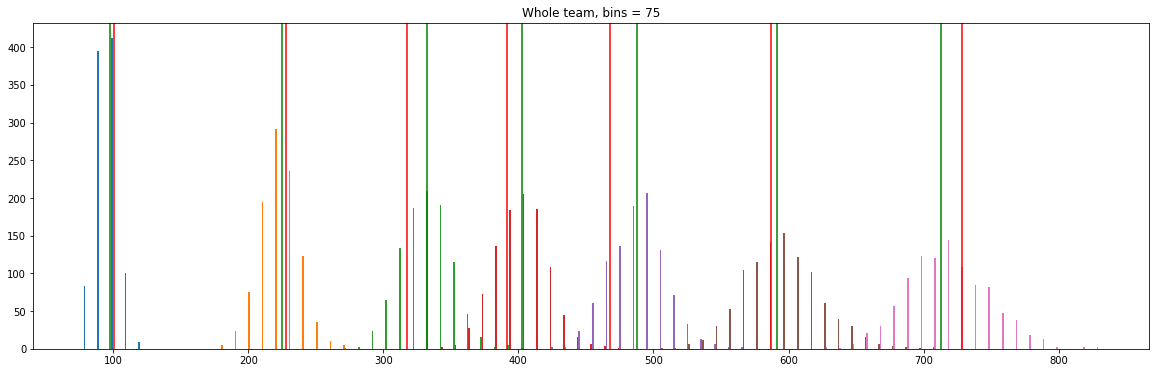

MultiIndex(levels=[['placement', 'team-time', 'team-name', 'team-nro', 'emit', 'leg-time', 'competitor-name', 'control-times', 'final_log_means', 'final_log_stdevs', 'leg_dist', 'est_median', 'fin_real', 'fin_med', 'fin_log_std', 'fin_start95'], [1, 2, 3, 4, 5, 6, 7, '']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 7]],
           names=[None, 'leg-n

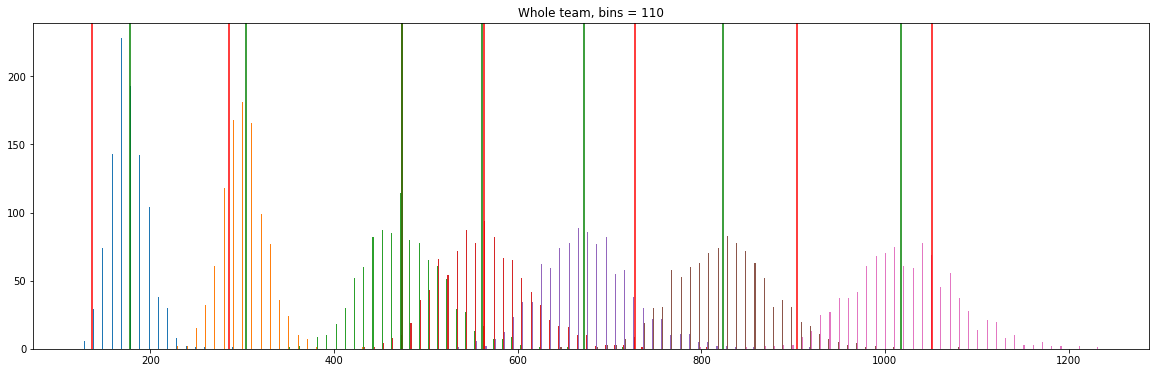

team-id
532     ([83.60063289500128, 196.44946053380892, 297.7...
1547    ([143.98075535873087, 259.4492067969048, 402.0...
dtype: object

In [72]:

def get_simulated_medians(row):
    print(row.index)
    samples = pd.DataFrame()
    for i in range(1,8):
        samples[i] = row["leg_dist"][i] * lognorm.rvs(s = row["final_log_stdevs"][i], scale = np.exp(row["final_log_means"][i]), size = 1000)

    samples_sums = pd.DataFrame()
    for i in range(1,8):
        samples_sums[i] = np.sum([ samples[j] for j in range(1,i+1) ], axis=0)

    start95 = samples_sums.quantile(0.025)
    end95 = samples_sums.quantile(0.975)
    medians = samples_sums.median()
    means = samples_sums.mean()
    
    """
    for i in range(1,8):
        bins = int(samples_sums[i].max() - samples_sums[i].min())
        name = row["competitor-name"][i]
        plt.title(f"{name} bins = {bins}")
        plt.hist(samples_sums[i], bins=bins)
        plt.axvline(x=row["fin_real"][i], color="r")        
        plt.axvline(x=medians[i], color="g")
        plt.axvline(x=means[i], color="yellow")
        plt.show()
    """
    bins = int( (samples_sums.max().max() - samples_sums.min().min()) / 10) 
    plt.figure(figsize=(20, 6))
    plt.title(f"Whole team, bins = {bins}")
    plt.hist([samples_sums[1], samples_sums[2], samples_sums[3], samples_sums[4], samples_sums[5], samples_sums[6], samples_sums[7]], bins=bins)
    for i in range(1,8):
        plt.axvline(x=row["fin_real"][i], color="r")
        plt.axvline(x=medians[i], color="g")

    plt.show()
    
    iterables = [range(1,8)]
    leg_index = pd.MultiIndex.from_product(iterables, names=['leg-nro'])

    new_cols = (pd.Series(start95.values, index=leg_index), pd.Series(end95.values, index=leg_index))
    #print(start95.values)
    #print(new_cols)
    return new_cols

simulated_median = by_teams.apply(get_simulated_medians, axis=1)
simulated_median



In [26]:
simulated_median
#by_teams.unstack().swaplevel("leg-nro", "team-id").to_dict()

team-id
532     ([83.21336515771357, 199.26001497799808, 301.9...
1547    ([142.62275640340584, 257.6377109169031, 399.5...
dtype: object

In [71]:
simulated_median

team-id
532     ([83.2823664813565, 197.7775073137155, 301.047...
1547    ([142.75539459402484, 258.912041969842, 398.08...
dtype: object

In [44]:
by_teams

placement                                                 team-time  \
leg-nro         1       2       3       4       5       6       7         1   
team-id                                                                       
532         429.0   429.0   429.0   429.0   429.0   429.0   429.0   43713.0   
1547       1270.0  1270.0  1270.0  1270.0  1270.0  1270.0  1270.0   63064.0   

                                                 ...                          \
leg-nro        2        3                        ...                           
team-id                                          ...                           
532      43713.0  43713.0                        ...                           
1547     63064.0  63064.0                        ...                           

            fin_med              fin_log_std                                \
leg-nro           6            7           1         2         3         4   
team-id                                                                      
532      590.301288   710.813982    1.039414  1.636911  2.078336  2.159897   
1547     812.994370  1005.956317    1.448377  2.103610  3.311677  3.654814   

                                       \
leg-nro         5         6         7   
team-id                                 
532      2.307081  2.962998  3.244626   
1547     3.764226  3.956417  4.257953   

                                               fin_start95  
leg-nro                                                     
team-id                                                     
532      ([83.21336515771357, 199.26001497799808, 301.9...  
1547     ([142.62275640340584, 257.6377109169031, 399.5...  

[2 rows x 106 columns]

In [62]:
by_teams_2 = by_teams.copy()

In [63]:
by_teams_2.columns = [f'{x[0]}_{x[1]}' for x in by_teams_2.columns]
by_teams_2.reset_index()

,team-id,placement_1,placement_2,placement_3,placement_4,placement_5,placement_6,placement_7,team-time_1,team-time_2,...,fin_med_6,fin_med_7,fin_log_std_1,fin_log_std_2,fin_log_std_3,fin_log_std_4,fin_log_std_5,fin_log_std_6,fin_log_std_7,fin_start95_
0,532,429.0,429.0,429.0,429.0,429.0,429.0,429.0,43713.0,43713.0,...,590.301288,710.813982,1.039414,1.636911,2.078336,2.159897,2.307081,2.962998,3.244626,"([83.21336515771357, 199.26001497799808, 301.9..."
1,1547,1270.0,1270.0,1270.0,1270.0,1270.0,1270.0,1270.0,63064.0,63064.0,...,812.994370,1005.956317,1.448377,2.103610,3.311677,3.654814,3.764226,3.956417,4.257953,"([142.62275640340584, 257.6377109169031, 399.5..."


In [29]:
by_teams["fin_start95"] = simulated_median

In [30]:
simulated_median

team-id
532     ([83.21336515771357, 199.26001497799808, 301.9...
1547    ([142.62275640340584, 257.6377109169031, 399.5...
dtype: object

In [35]:
by_teams.to_json()

'{"["placement",1]":{"532":429.0,"1547":1270.0},"["placement",2]":{"532":429.0,"1547":1270.0},"["placement",3]":{"532":429.0,"1547":1270.0},"["placement",4]":{"532":429.0,"1547":1270.0},"["placement",5]":{"532":429.0,"1547":1270.0},"["placement",6]":{"532":429.0,"1547":1270.0},"["placement",7]":{"532":429.0,"1547":1270.0},"["team-time",1]":{"532":43713.0,"1547":63064.0},"["team-time",2]":{"532":43713.0,"1547":63064.0},"["team-time",3]":{"532":43713.0,"1547":63064.0},"["team-time",4]":{"532":43713.0,"1547":63064.0},"["team-time",5]":{"532":43713.0,"1547":63064.0},"["team-time",6]":{"532":43713.0,"1547":63064.0},"["team-time",7]":{"532":43713.0,"1547":63064.0},"["team-name",1]":{"532":"Reaktor Innovations","1547":"Reaktor Innovations"},"["team-name",2]":{"532":"Reaktor Innovations","1547":"Reaktor Innovations"},"["team-name",3]":{"532":"Reaktor Innovations","1547":"Reaktor Innovations"},"["team-name",4]":{"532":"Reaktor Innovations","1547":"Reaktor Innovations"},"["team-name",5]":{"532":

In [32]:
pd.Series([143.5489678,  258.15917411, 397.11974059, 477.686528,   582.25258577,
 724.62528584, 908.57647503]).reindex(level="leg-nro")

0    143.548968
1    258.159174
2    397.119741
3    477.686528
4    582.252586
5    724.625286
6    908.576475
dtype: float64

### 